In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from torchvision.models import resnet50

import cv2
import matplotlib.pyplot as plt
from PIL import Image
from colorama import Fore

In [2]:
import ipynb
from ipynb.fs.full.utils import fix_seed, get_face, get_prediction

In [3]:
transforms = T.Compose([
        T.Resize((128,128)),
        T.ToTensor(),
        T.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        ),
])

In [4]:
WGTS_PATH = '/media/users/cgambina/Progetto_6/Dati/BestWeights/best_model.pt'

net = resnet50()
n_filters = net.fc.in_features
net.fc = nn.Linear(n_filters, 1)

net.load_state_dict(torch.load(WGTS_PATH))
net.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

SENZA MASCHERA


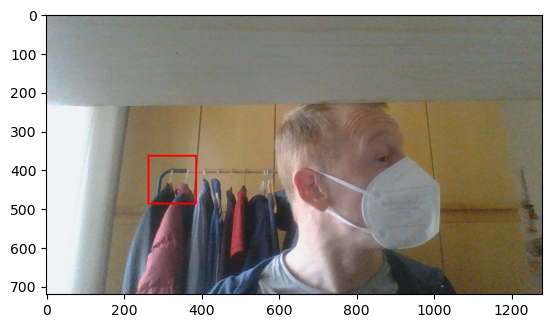

In [10]:
foo_img = '/media/users/cgambina/Progetto_6/Script/ConMaschera.jpg'
try:
    face_box = get_face(foo_img)
    res = get_prediction(face_box, transforms, net)

    if res < 0.5:
        get_face(foo_img, box_color=(0,255,0))
        print(Fore.GREEN + 'CON MASCHERA')
    else:
        get_face(foo_img, box_color=(255,0,0))
        print(Fore.RED + 'SENZA MASCHERA')
    
except:
    print(Fore.YELLOW + 'ATTENZIONE: volto NON rilavato!!!')

In [6]:
'''
save_as = '/media/users/cgambina/Progetto_6/Script/img.jpg'

cap = cv2.VideoCapture(0) # 
ret,frame = cap.read()

while(True):
    cv2.imshow('img1',frame)
    if cv2.waitKey(1) & 0xFF == ord('y'): 
        cv2.imwrite(save_as,frame)
        cv2.destroyAllWindows()
        break

cap.release()
'''

"\nsave_as = '/media/users/cgambina/Progetto_6/Script/img.jpg'\n\ncap = cv2.VideoCapture(0) # \nret,frame = cap.read()\n\nwhile(True):\n    cv2.imshow('img1',frame)\n    if cv2.waitKey(1) & 0xFF == ord('y'): \n        cv2.imwrite(save_as,frame)\n        cv2.destroyAllWindows()\n        break\n\ncap.release()\n"